# Investigating virtual spiral tips
Tim Tyree<br>
11.21.2020

In [1]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show


import numba, trackpy, sklearn
# from numba import njit, jit, vectorize
# from PIL import Image
# import imageio
# import cv2 as cv

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()

#load the libraries
from lib import *
from lib.dist_func import *
# from lib.operari import *
# from lib.ProgressBar import *
# from lib.minimal_model import *
# from lib.TexturePlot import *
# from lib.get_tips import *
# from lib.minimal_model import *
# from lib.intersection import *
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

%autocall 1
%load_ext autoreload
%autoreload 2

100000
Automatic calling is: Smart


# step 1: compute birth-death rates from log and identify a fast birth-death event from the resulting csv

In [104]:
from lib.routines.bdrates import *

In [105]:
# input_file_name = search_for_file()
input_file_name = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/ic_200x200.001.13_log.csv"
# output_file_name = input_file_name.replace('log.csv','bdrates.csv')

save_folder="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/"
outdir = log_to_bdrates_routine(input_file_name, save_folder, min_time_between_samples=1)
# log_to_bdrates(input_file_name, output_file_name)

data_dir_bdrates = outdir

In [106]:
df =  pd.read_csv(data_dir_bdrates)

In [107]:
df.head()

,t,n,dn,rates
0,39,20,-2.0,0.027778
1,75,18,-4.0,0.002551
2,467,14,2.0,0.015625
3,531,16,-2.0,0.008929
4,643,14,-2.0,0.002976


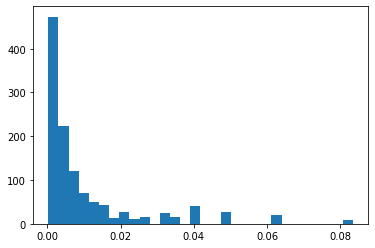

In [108]:
plt.hist(df.rates, bins=30)
plt.show()

In [109]:
#find that highest bdrates
df[df.rates==df.rates.max()]
df

,t,n,dn,rates
0,39,20,-2.0,0.027778
1,75,18,-4.0,0.002551
2,467,14,2.0,0.015625
3,531,16,-2.0,0.008929
4,643,14,-2.0,0.002976
...,...,...,...,...
1179,481915,6,-2.0,0.000962
1180,482955,4,-2.0,0.027778
1181,482991,2,2.0,0.008929
1182,483103,4,-2.0,0.011905


In [110]:
max_high_frequency_times = df[df.rates==df.rates.max()].t.values
first_max_high_frequency_time = max_high_frequency_times[0]

In [118]:
df[df.t==first_max_high_frequency_time]
#Eureka! These 't' are really indices
max_high_frequency_indices = max_high_frequency_times

# import tip log and visualize the tips at those frames
#TODO(later): compute the texture at that earliest time

In [126]:
os.chdir(save_folder)
data_dir_txt = 'ic_200x200.001.13.npz'
data_dir_log = "ic_200x200.001.13_log.csv"
data_dir_traj  = "ic_200x200.001.13_traj_sr_400_mem_2.csv"

In [127]:
df = pd.read_csv(data_dir_log)

In [139]:
#Eureka! These 't' are really indices
max_high_frequency_time = float(df[df.index==max_high_frequency_indices[3]].t.values)


In [140]:

#get tip data to plot
gf = df[df.t==max_high_frequency_time-1]
x_values = gf.x.values
y_values = gf.y.values
c_values = np.abs(gf.theta.values)
print(c_values)

gf = df[df.t==max_high_frequency_time]
x_values = gf.x.values
y_values = gf.y.values
c_values = np.abs(gf.theta.values)
print(c_values)

gf = df[df.t==max_high_frequency_time+1]
x_values = gf.x.values
y_values = gf.y.values
c_values = np.abs(gf.theta.values)
print(c_values)

[1.88331 0.90145 1.66922 1.26239 2.87989     nan 2.71775 2.36941 1.88331
 0.90145 1.66922 1.26239 2.87989     nan 2.71775 2.36941]
[1.90807 0.63428 1.67293 1.48849     nan 2.2201      nan 2.02781 1.90807
 0.63428 1.67293 1.48849     nan 2.2201      nan 2.02781]
[1.93142 0.50143 1.68232 1.29659     nan     nan 1.93142 0.50143 1.68232
 1.29659     nan     nan]


In [115]:
sum(df.t==max_high_frequency_time)
sum(np.isclose(df.t,max_high_frequency_time))

0

In [116]:
df.t.describe()

count    483189.000000
mean      14473.330943
std        8226.487881
min           0.000000
25%        7427.000000
50%       14677.000000
75%       21714.000000
max       28581.025000
Name: t, dtype: float64

In [88]:
max_high_frequency_time

65119

In [119]:
src = data_dir_log
df = pd.read_csv(src)
df.head()

,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt
0,0.0,20,0.95045,47.03408,1.98477,0.49952,1.00000,43.74147,0.13557,0.52435,0.01091,0.83900,0.32697,-0.00084,-0.00105
1,0.0,20,6.34369,2.40403,1.17551,-1.02701,6.66390,1.11790,0.61298,0.50346,0.07454,0.82358,-0.00010,-0.00572,-0.00103
2,0.0,20,10.57992,199.59560,2.89619,-0.14802,1.05754,0.08225,1.05059,0.48484,0.27666,0.87655,0.00795,-0.02123,-0.00110
3,0.0,20,51.37607,0.34081,1.50927,1.00000,-0.67824,0.99233,1.69736,0.50706,0.55666,0.93134,-0.01240,-0.04272,-0.00116
4,0.0,20,52.38630,57.23394,2.02178,3.69757,-1.45046,-0.23487,2.12278,0.47905,0.06825,0.81568,0.00059,-0.00524,-0.00102


# TODO: scatter plot spiral tips as stars, coloring black/white by c_values during a high-frequency birth-death event

In [143]:
c_values = df.theta.isnull().values

In [145]:
c_values

array([False, False, False, ..., False,  True,  True])

In [155]:
df.head()

,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt
0,0.0,20,0.95045,47.03408,1.98477,0.49952,1.00000,43.74147,0.13557,0.52435,0.01091,0.83900,0.32697,-0.00084,-0.00105
1,0.0,20,6.34369,2.40403,1.17551,-1.02701,6.66390,1.11790,0.61298,0.50346,0.07454,0.82358,-0.00010,-0.00572,-0.00103
2,0.0,20,10.57992,199.59560,2.89619,-0.14802,1.05754,0.08225,1.05059,0.48484,0.27666,0.87655,0.00795,-0.02123,-0.00110
3,0.0,20,51.37607,0.34081,1.50927,1.00000,-0.67824,0.99233,1.69736,0.50706,0.55666,0.93134,-0.01240,-0.04272,-0.00116
4,0.0,20,52.38630,57.23394,2.02178,3.69757,-1.45046,-0.23487,2.12278,0.47905,0.06825,0.81568,0.00059,-0.00524,-0.00102


In [154]:
# df.describe().T

In [157]:
print(f"Is the ratio of virtual spiral tips to spiral tips = {1-df.t.count()/df.theta.count():.3f}?")

Is the ratio of virtual spiral tips to spiral tips = -0.081?


In [159]:
df.theta.dropna()

0         1.98477
1         1.17551
2         2.89619
3         1.50927
4         2.02178
           ...   
483181    2.23391
483182    2.61639
483183    2.23391
483184    2.56158
483186    2.56158
Name: theta, Length: 446800, dtype: float64